# Notebook test in Colab

## Setup

Check that a GPU is going to be used

In [1]:
import tensorflow as tf
import keras
tf.__version__
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print('GPU' in str(device_lib.list_local_devices()))
tf.device("XLA_GPU")
from keras import backend
print("GPU's seen by Keras ",len(backend.tensorflow_backend._get_available_gpus()))

Using TensorFlow backend.
W0728 21:56:39.759698 140426208696128 deprecation_wrapper.py:119] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0728 21:56:39.761249 140426208696128 deprecation_wrapper.py:119] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0728 21:56:39.762398 140426208696128 deprecation_wrapper.py:119] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0728 21:56:39.779688 140426208696128 deprecation_wrapper.py:119] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2375847270165842188
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4377043982545530441
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10813738189
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17958402841481427099
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:61:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7996794733397235399
physical_device_desc: "device: XLA_GPU device"
]
True
GPU's seen by Keras  1


In [2]:
#!git clone -b allevaluation --single-branch https://github.com/asalvadorsalas/HplusML.git
#import sys
#sys.path.append("HplusML") #Include the package to python sys path

Get one of the samples from personal web and move them to a folder in the machine. If you load the data from another disk the training will take more time!

In [3]:
!wget http://adsalvad.web.cern.ch/adsalvad/HplusML/pandas_INC_ge6jge4b.h5 
!cp pandas_INC_ge6jge4b.h5 /tmp/salvador/
!ls /tmp/salvador

--2019-07-28 21:56:51--  http://adsalvad.web.cern.ch/adsalvad/HplusML/pandas_INC_ge6jge4b.h5
Resolving adsalvad.web.cern.ch (adsalvad.web.cern.ch)... 137.138.123.56, 2001:1458:d00:16::187
Connecting to adsalvad.web.cern.ch (adsalvad.web.cern.ch)|137.138.123.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51165780 (49M) [text/plain]
Saving to: ‘pandas_INC_ge6jge4b.h5’

100%[======================================>] 51,165,780  34.3MB/s   in 1.4s   

2019-07-28 21:56:52 (34.3 MB/s) - ‘pandas_INC_ge6jge4b.h5’ saved [51165780/51165780]

pandas_INC_ge6jge4b.h5


## Importing the pandas file

In [4]:
import pandas as pd
import numpy as np
import tables
import h5py
import joblib
print(np.version.version,pd.__version__, tables.__version__, )
print("Use these versions...")
print("1.16.4 0.25.0 3.5.2 <-- (worked in pic)")

1.16.4 0.25.0 3.5.2
Use these versions...
1.16.4 0.25.0 3.5.2 <-- (worked in pic)


With pandas you can load the data, you need the file and the name of the item. I usually use the same name.

In [5]:
df_mc = pd.read_hdf('/tmp/salvador/pandas_INC_ge6jge4b.h5','INC_ge6jge4b')

The pandas package allows visualisation and easy data-analysis management. This df_mc is a big matrix with the variables as columns and events as rows

In this particular example not only variables were stored... I also saved the overall weight, process, sample group, region and hpmass are stored

In [6]:
df_mc.head()

,index,Mbb_MindR_70,eventNumber,Muu_MindR_70,nBTags_70,Centrality_all,pT_jet5,dRlepbb_MindR_70,H1_all,Mjjj_MaxPt,...,dRbb_avg_70,nJets,Mbb_MaxPt_70,HT_jets,weight,process,group,region,pT_jet1,hpmass
1853266,0,78006.718750,26311789,93472.070312,4,0.647530,48389.015625,2.942365,0.428227,165577.281250,...,1.836845,6,78006.718750,410279.37500,0.769165,ttlight,t#bar{t} + light,INC_ge6jge4b,94875.250000,-1
1853267,1,144572.250000,8057383,86068.453125,4,0.636615,38330.675781,2.980346,0.077838,184632.640625,...,2.357118,6,144572.250000,470684.46875,0.867114,ttlight,t#bar{t} + light,INC_ge6jge4b,158391.453125,-1
1853268,2,45798.390625,21899308,283880.406250,4,0.649095,72458.781250,1.807999,0.004904,153976.984375,...,1.430680,6,81811.507812,577440.87500,0.660478,ttlight,t#bar{t} + light,INC_ge6jge4b,182397.343750,-1
1853269,3,68210.140625,18972816,156986.078125,4,0.663991,33645.386719,3.255158,0.019155,251311.531250,...,2.663929,7,152639.437500,424901.68750,0.605552,ttlight,t#bar{t} + light,INC_ge6jge4b,154738.656250,-1
1853270,4,67664.296875,11299806,43554.640625,4,0.743293,45294.984375,3.130159,0.119582,156184.890625,...,1.951383,6,98741.585938,371469.62500,0.350783,ttlight,t#bar{t} + light,INC_ge6jge4b,94807.296875,-1


## Preparing training samples

The HpTrainingFrame class prepares the data for machine learning.

The prepare function splits the pandas into training and testing data. Default trains with even events.

Also returns the labels 1 for signal and 0 for background . If you specify a mass, it will return only the corresponding signal. If hpmass is not specified or "multi", will return all signals.

The remaining columns will be the ones for the training

`feature_names=["nJets","nBTags_70","pT_jet1","Mbb_MindR_70","pT_jet5","H1_all","dRbb_avg_70","dRlepbb_MindR_70","Muu_MindR_70","HT_jets","Mbb_MaxPt_70","Mbb_MaxM_70","Mjjj_MaxPt","Centrality_all"]` 

but it can also return or not a column with the truth hpmass

In [7]:
import HpTrainingFrame
htf = HpTrainingFrame.HpTrainingFrame(df_mc)

In [8]:
X_train, X_test, X_eval, y_train, y_test, y_eval, w_train, w_test, w_eval = htf.prepare(hpmass="multi",region=None,addMass=True)

In [9]:
print("Example of bkg --> label = ",y_train[X_train.hpmass==-1].values[0])
X_train[X_train.hpmass==-1].head(1)

Example of bkg --> label =  0


,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,Mbb_MaxPt_70,Mbb_MaxM_70,Mjjj_MaxPt,Centrality_all,hpmass
341420,8,4,279404.96875,37746.167969,32479.382812,0.035688,2.899867,4.32505,34004.242188,650862.3125,275263.5,275263.5,193024.15625,0.589056,-1


In [10]:
print("Example of signal --> label = ",y_train[X_train.hpmass==400].values[0])
X_train[X_train.hpmass==400].head(1)

Example of signal --> label =  1


,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,Mbb_MaxPt_70,Mbb_MaxM_70,Mjjj_MaxPt,Centrality_all,hpmass
122213,6,4,175288.5,97883.515625,86733.34375,0.584247,2.045868,1.363475,139964.9375,742981.625,163673.53125,301970.09375,238638.71875,0.583722,400


Important! For the MassParameterised classifier the labels are the hplus mass so we need this step

In [11]:
y_train = X_train.hpmass.copy()
y_test = X_test.hpmass.copy()
print(y_train.unique())

[  -1 1400  700  200  600  500 1000  900  800 1600  350  300  400  275
 1800 2000 1200  250  225]


## Pre-training classes

### Multi SBWeight Scaler

   Class that makes the integral of the signal/background weights be 0.5.
   The MultiS allows to flatten the integral for the different signals


In [12]:
from HpMLWeightTransformer import MultiSBWeightsScaler
msb = MultiSBWeightsScaler(backgroundclass=-1) #specify which label is the background
msb.fit(X_train,X_train.hpmass, sample_weight=w_train) #Fit functions always makes the object "learn" what they have to do. In this case, which scale to apply to each weight
print("The weights that the MultiSBWeightScaler learns:")
print(msb.scale_)
print("Examples of weights pre applying the weight:")
print("A 400 GeV: ",w_train[X_train.hpmass==400].values[0],"\nA 1600 GeV:",w_train[X_train.hpmass==1600].values[0],"\nA bkg:     ", w_train[X_train.hpmass==-1].values[0])

The weights that the MultiSBWeightScaler learns:
{200: 6.330181759898593e-05, 225: 4.6882277424844784e-05, 250: 4.6429438068493466e-05, 275: 5.1102611062368545e-05, 300: 8.785527710912767e-05, 350: 0.00015517754214396155, 400: 0.00030529697848525803, 500: 0.0007353646113609462, 600: 0.0012769318908948562, 700: 0.002181859863822662, 800: 0.0037443427437358926, 900: 0.006168306769410176, 1000: 0.015865187231341758, 1200: 0.056591116654246605, 1400: 0.14651717058731545, 1600: 0.37094285148110917, 1800: 0.8770459769536209, 2000: 2.039973846697376, -1: 0.00028197737675246873}
Examples of weights pre applying the weight:
A 400 GeV:  0.008664788215486087 
A 1600 GeV: 1.2579820931327263e-05 
A bkg:      0.018992088933771595


The transform functions apply the changes. ### bug/feature ### this function changes the input itself  

In [13]:
X_train, y_train, w_train = msb.transform(X_train,y_train, sample_weight=w_train)
X_test, y_test, w_test = msb.transform(X_test,y_test, sample_weight=w_test)

In [14]:
print("Examples of weights after applying the weight:")
print("A 400 GeV: ",w_train[X_train.hpmass==400].values[0],"\nA 1600 GeV:",w_train[X_train.hpmass==1600].values[0],"\nA bkg:     ", w_train[X_train.hpmass==-1].values[0])

Examples of weights after applying the weight:
A 400 GeV:  2.645333661402573e-06 
A 1600 GeV: 4.666394647388277e-06 
A bkg:      5.355339416594505e-06


### WeightsMultiplier

At this point each signal is equally important for the training.
Julian played around with scales to give more importance to low mass points.

In [15]:
from HpMLWeightTransformer import WeightsMultiplier
scales={
  200:16.,
  225:8.,
  250:8.,
  275:8.,
  300:16./3.,
  350:4.,
  400:8./3.,
  500:2.,
  600:2.,
  700:2.,
  800:2.,
  900:2.,
  1000:4./3.,
  1200:1.,
  1400:1.,
  1600:1.2,
  1800:1.5,
  2000:4.,
}
scl = WeightsMultiplier(scales=scales,backgroundclass=-1)
scl.fit(X_train,X_train.hpmass, sample_weight=w_train) #this function does completely nothing is defined to maintain the rest of the classes structure
print("Examples of weights pre applying the scale:")
print("A 400 GeV: ",w_train[X_train.hpmass==400].values[0],"\nA 1600 GeV:",w_train[X_train.hpmass==1600].values[0],"\nA bkg:     ", w_train[X_train.hpmass==-1].values[0])

Examples of weights pre applying the scale:
A 400 GeV:  2.645333661402573e-06 
A 1600 GeV: 4.666394647388277e-06 
A bkg:      5.355339416594505e-06


In [16]:
X_train, y_train, w_train = scl.transform(X_train,y_train, sample_weight=w_train)
X_test, y_test, w_test = scl.transform(X_test,y_test, sample_weight=w_test)
print("Examples of weights post applying the scale:")
print("A 400 GeV: ",w_train[X_train.hpmass==400].values[0],"\nA 1600 GeV:",w_train[X_train.hpmass==1600].values[0],"\nA bkg:     ", w_train[X_train.hpmass==-1].values[0])

Examples of weights post applying the scale:
A 400 GeV:  7.054223097073528e-06 
A 1600 GeV: 5.599673576865933e-06 
A bkg:      5.355339416594505e-06


### Background Augmentation

The hpmass labels assigned to background are done following the same distribution as signal meaning that the hpmass input will not be used as the main discriminating variable. 

Problem: we have less background comparing directly to the same signal. 

Solution: Clone background as many times as different signals so it is ensured that all signals will have the same bkg to train against. In a NN, redundant information is unused. 

In [17]:
from HpMLMTL import HpMTLBackgroundAugmenter
aug = HpMTLBackgroundAugmenter(backgroundclass=-1,verbose=True)
aug.fit(X_train,X_train.hpmass, sample_weight=w_train) #learns the sumweight for each signal and background

Signal PDF: [200, 225, 250, 275, 300, 350, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000] [0.10457516339869281, 0.052287581699346386, 0.05228758169934639, 0.05228758169934641, 0.0522875816993464, 0.0522875816993464, 0.0522875816993464, 0.052287581699346414, 0.0522875816993464, 0.0522875816993464, 0.05228758169934641, 0.0522875816993464, 0.05228758169934642, 0.05228758169934641, 0.0522875816993464, 0.06274509803921569, 0.0784313725490196, 0.2091503267973856]
Background PDF: 0.5000000000000001


The transorm function will produce background for each signal with the same weight

In [18]:
X_train, y_train, w_train = aug.transform(X_train,y_train, sample_weight=w_train)
X_test, y_test, w_test = aug.transform(X_test,y_test, sample_weight=w_test)

the following is the difference between + and - mass
200     1.455549e-17
225     1.369124e-17
250     4.707849e-18
275     5.408458e-18
300     1.440402e-17
350     1.252107e-17
400     3.691317e-18
500     5.041964e-19
600     1.851196e-17
700    -3.276959e-20
800     1.505335e-17
900     1.008530e-17
1000    5.281105e-18
1200   -5.866233e-19
1400    1.197959e-17
1600    1.030870e-17
1800    1.842043e-17
2000    4.817851e-17
dtype: float64
the following is the sum of weights
hpmass
200     0.209150
225     0.104575
250     0.104575
275     0.104575
300     0.104575
350     0.104575
400     0.104575
500     0.104575
600     0.104575
700     0.104575
800     0.104575
900     0.104575
1000    0.104575
1200    0.104575
1400    0.104575
1600    0.125490
1800    0.156863
2000    0.418301
Name: weight, dtype: float64
the following is the difference between + and - mass
200    -0.002804
225    -0.001289
250    -0.001308
275    -0.001076
300    -0.001032
350    -0.002000
400    -0.002858
500 

### Feature Divider

The idea behind a very simple NN is that is trying to minimise the loss of,
$y=\sigma(\sum w_{i}x_{i})$ ,

whereeach input $x_{i}$ is be multiplied by an individual weight $w_{i}$. In theory, the NN will find the best linear combination for this setup. 

As we suppose that our inputs are functions on the $m_{H^+}$ , so a more complex NN will have more nodes/weights that will allow to apply very complex expressions with this parameter. However, we can help the NN with more inputs with the most obvious relation, $x_{i}/m_{H^+}$, so it will find faster its relation with the other variables and will start some kind of Tylor expansion with $x_{i}/m_{H^+}$ as the first term




In [19]:
from HpMLUtils import FeatureDivider
fd = FeatureDivider("hpmass") #need to specify which variable are you using to divide, not going to divide nJets or nBTags
fd.fit(X_train,X_train.hpmass, sample_weight=w_train) #not learning anything really...
X_train[y_train==1000][:1].head()

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,Mbb_MaxPt_70,Mbb_MaxM_70,Mjjj_MaxPt,Centrality_all,hpmass
212708,9,4,176271.59375,145684.125,60155.3125,0.040445,2.57887,2.749826,43379.183594,649318.875,145684.125,228657.28125,237817.515625,0.731782,1000


In [20]:
X_train, y_train, w_train = fd.transform(X_train,y_train, sample_weight=w_train)
X_test, y_test, w_test = fd.transform(X_test,y_test, sample_weight=w_test)

See an 1000 GeV mass event example after the transformation. More columns are added. 

In [21]:
X_train[y_train==1000][:1].head()

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,...,pT_jet5divhpmass,H1_alldivhpmass,dRbb_avg_70divhpmass,dRlepbb_MindR_70divhpmass,Muu_MindR_70divhpmass,HT_jetsdivhpmass,Mbb_MaxPt_70divhpmass,Mbb_MaxM_70divhpmass,Mjjj_MaxPtdivhpmass,Centrality_alldivhpmass
212708,9,4,176271.59375,145684.125,60155.3125,0.040445,2.57887,2.749826,43379.183594,649318.875,...,60.155313,0.00004,0.002579,0.00275,43.379184,649.318875,145.684125,228.657281,237.817516,0.000732


### Standard Scaler

The NN is not scale invariant and having inputs with different scales usually translates to different scales in weights, making the NN unstable, making weights change by an order of magnitude every step.

The standard scaler will obtain the mean and variance of each input and then apply it.

In [22]:
from HpMLFeatureNormalisation import WeightedStandardScaler
wss=WeightedStandardScaler()
wss.fit(X_train,X_train.hpmass, sample_weight=w_train) #variance and mean of each input


WeightedStandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
print("Feature\t\tmean\t\tsqrt(variance)")
for feature, mean, scale in zip(X_train.columns,wss.mean_,wss.scale_):
  print (feature,"\t", mean, "\t" ,scale)
  


Feature		mean		sqrt(variance)
nJets 	 7.271471140040663 	 1.3660894719082064
nBTags_70 	 4.084819928477077 	 0.2998339467716273
pT_jet1 	 263711.390030526 	 204215.2572351807
Mbb_MindR_70 	 104374.3010229407 	 85174.01466562929
pT_jet5 	 60617.33042192924 	 30843.303276584407
H1_all 	 0.20190117962790796 	 0.2011458251873726
dRbb_avg_70 	 2.3204342477620883 	 0.39274823290383
dRlepbb_MindR_70 	 2.231133586138163 	 0.9250884364598335
Muu_MindR_70 	 110593.8167963899 	 118635.22133027633
HT_jets 	 774903.2064692483 	 457100.93048358953
Mbb_MaxPt_70 	 223160.0296638107 	 201644.35949531282
Mbb_MaxM_70 	 435537.20241112297 	 315832.33608703257
Mjjj_MaxPt 	 381108.2530693616 	 294906.63223956025
Centrality_all 	 0.5876715431757465 	 0.13883317010415136
hpmass 	 965.6387665198234 	 675.4488877086467
pT_jet1divhpmass 	 395.316192622926 	 332.2900643499042
Mbb_MindR_70divhpmass 	 172.38018618913233 	 162.3817480557944
pT_jet5divhpmass 	 105.93698409483243 	 88.0420273380624
H1_alldivhpmass 	 0

In [24]:
X_train, y_train, w_train = wss.transform(X_train,y_train, sample_weight=w_train)
X_test, y_test, w_test = wss.transform(X_test,y_test, sample_weight=w_test)

(1662533, 27) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
(1676652, 27) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


Here we can see that the variables are brought to a smaller scale

In [25]:
X_train[y_train==1000][:1].head()

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,...,pT_jet5divhpmass,H1_alldivhpmass,dRbb_avg_70divhpmass,dRlepbb_MindR_70divhpmass,Muu_MindR_70divhpmass,HT_jetsdivhpmass,Mbb_MaxPt_70divhpmass,Mbb_MaxM_70divhpmass,Mjjj_MaxPtdivhpmass,Centrality_alldivhpmass
212708,1.265312,-0.28289,-0.428175,0.485005,-0.01498,-0.802681,0.658018,0.560695,-0.566566,-0.274741,...,-0.519998,-0.600537,-0.531154,-0.397422,-0.554555,-0.614951,-0.531875,-0.744858,-0.586598,-0.426391


Last step. The NN need a binary classification...

In [26]:
y_train=(y_train>0)
y_test=(y_test>0)

## NN



The NN that we use is big and simple:

--> two hidden layers of 64 nodes with relu activation and no  regularizer

--> dropout 0.1 ( for each epoch 10% of the conections are not used in the training )

--> patience 5: if in 5 epochs the loss function is no timproving at all stop

--> max 100 epochs with 50 bach sizes

--> Output passes through a sigmoid (outpot 0 or 1)



In [27]:
import HpKerasUtils
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
modelNN = HpKerasUtils.HpFeedForwardModel(configuration=[64,64],dropout=0.1, verbose=True, input_dim=X_train.shape[1])

W0728 21:57:26.405040 140426208696128 deprecation_wrapper.py:119] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 21:57:26.425451 140426208696128 deprecation.py:506] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0728 21:57:26.470958 140426208696128 deprecation_wrapper.py:119] From /nfs/pic.es/user/s/salvador/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 21:57:26.490854 140426208696128 deprecation.py:323] From /nfs/at3/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1792      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
_________________________________________________________________


Once defined the structure of the NN, lets train
Callbacks are functions to be applied between epochs. Our patience function is defined evaluation the loss on the testing sample to avoid overtraining.
An epoch is defined when all the data is read by the NN.
The batch size is the size of samples used to optimise the weights on each iteration. The higher the batch size, less times are the weights changed for the same number of epochs. Lower the batch size, more sensible is the training to individual "extrange" events.

In [28]:
def getCallbacks(model): #Needed this in order to separate the initial model and the trained model
    """ standard callbacks for Keras """
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath='model_nn_'+str(model.configuration)+"_dropout"+str(model.dropout)+"_l2threshold"+str(model.l2threshold)+".hdf5",
                        monitor='val_loss',
                        save_best_only=True)
      ]
  
resultNN=modelNN.train((X_train.values, y_train.values, w_train.values),(X_test.values, y_test.values, w_test.values), patience=5,callbacks=getCallbacks(modelNN),batch_size=128)

batch_size= 128
Train on 1662533 samples, validate on 1676652 samples
Epoch 1/100
1662533/1662533 [==============================] - 140s 84us/step - loss: 6.7824e-07 - binary_accuracy: 0.6904 - val_loss: 6.4432e-07 - val_binary_accuracy: 0.7020
Epoch 2/100
1662533/1662533 [==============================] - 139s 83us/step - loss: 6.4321e-07 - binary_accuracy: 0.7084 - val_loss: 6.3863e-07 - val_binary_accuracy: 0.6931
Epoch 3/100
1662533/1662533 [==============================] - 137s 83us/step - loss: 6.3642e-07 - binary_accuracy: 0.7106 - val_loss: 6.3357e-07 - val_binary_accuracy: 0.7209
Epoch 4/100
1662533/1662533 [==============================] - 137s 82us/step - loss: 6.3253e-07 - binary_accuracy: 0.7126 - val_loss: 6.3296e-07 - val_binary_accuracy: 0.7069
Epoch 5/100
1662533/1662533 [==============================] - 138s 83us/step - loss: 6.3037e-07 - binary_accuracy: 0.7132 - val_loss: 6.3026e-07 - val_binary_accuracy: 0.7375
Epoch 6/100
1662533/1662533 [=====================

Once the training is done, is a nice thing to save the model with joblib.dump. This function saves any object into a file that can be loaded again with joblib.load

In [30]:
joblib.dump(modelNN,"test")
#Batch size 128 (0.8826080614096995, 0.8884649553535318) epochs 12 of 136s
print(resultNN)

(0.8825458156694543, 0.8878050520635179)


Once saved, we can recover the trained model
We could also do it using the model_from_json function.

In [31]:
modelNN = joblib.load("tutorial/modelNN_b128")

#####for a model saved as
#arch_file=open('file.json','w')
#arch_file.write(modelNN.model.to_json())
#arch_file.close()
#modelNN.model.save_weights('weights.h5')
#####you can load the model as
#json_file = open("file.json")
#loaded_model_json = json_file.read()
#json_file.close()
#modelNN = model_from_json(loaded_model_json)
#modelNN.load_weights("weights.h5")
'''
To evaluate in C++ you also need extracted the standard scaler info
This parser writes as it is needed
with open('variables.json',"w+") as outfile:
      outfile.write('{\n')
      outfile.write('  "inputs": [\n')
    for feat,mean,scale in zip(X_train.columns,wss.mean_,wss.scale_):
        outfile.write('    {\n')
        outfile.write('      "name": "'+feat+'" ,\n')
        outfile.write('      "offset": '+str(-mean)+" ,\n")
        outfile.write('       "scale":'+str(1./scale)+" \n")
        #print (feat,"\t",-mean,1./scale)
        if feat==X_tr.columns[-1]: outfile.write('    }\n')
        else: outfile.write('    },\n')
    outfile.write('  ],\n')
    outfile.write('  "class_labels": ["'+region+'_'+datalabel+'"]\n')
    outfile.write('}')    
'''

'\nTo evaluate in C++ you also need extracted the standard scaler info\nThis parser writes as it is needed\nwith open(\'variables.json\',"w+") as outfile:\n      outfile.write(\'{\n\')\n      outfile.write(\'  "inputs": [\n\')\n    for feat,mean,scale in zip(X_train.columns,wss.mean_,wss.scale_):\n        outfile.write(\'    {\n\')\n        outfile.write(\'      "name": "\'+feat+\'" ,\n\')\n        outfile.write(\'      "offset": \'+str(-mean)+" ,\n")\n        outfile.write(\'       "scale":\'+str(1./scale)+" \n")\n        #print (feat,"\t",-mean,1./scale)\n        if feat==X_tr.columns[-1]: outfile.write(\'    }\n\')\n        else: outfile.write(\'    },\n\')\n    outfile.write(\'  ],\n\')\n    outfile.write(\'  "class_labels": ["\'+region+\'_\'+datalabel+\'"]\n\')\n    outfile.write(\'}\')    \n'

This HpFeedForwardModel object has a summary function built in

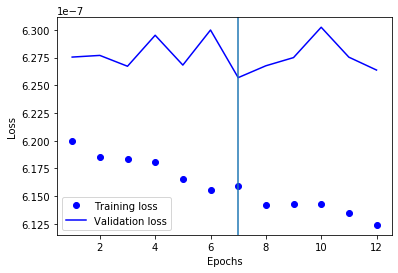

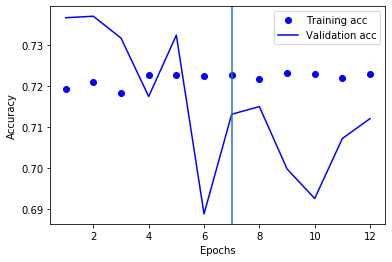

In [32]:
modelNN.plotTrainingValidation()

## NN evaluation from scratch

How can we evaluate individually each mass? We can do it in many ways
Lets do it with a first mass and half of the training

First, get the information with only the desired signal

In [33]:
region = "INC_ge6jge4b"
hpmass = 800
htf=HpTrainingFrame.HpTrainingFrame(df_mc)
X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass,region=region,addMass=True)

As this is a parameterized NN, the input has to be the hpmass we want to evaluate

In [34]:
X_train["hpmass"]=hpmass
X_test["hpmass"]=hpmass
X_test.head(1)

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,Mbb_MaxPt_70,Mbb_MaxM_70,Mjjj_MaxPt,Centrality_all,hpmass
120848,8,4,141608.875,63826.003906,81410.976562,0.001667,1.464466,2.993226,49279.46875,743148.875,118170.226562,162493.96875,155522.078125,0.538711,800


We also need to transform the input. The only classes needed are the feature divider and the scaler. Is very inportant to recover the original scaler of the training, as it defined the scale for the NN.

In [35]:
#First the feature divider
fd = FeatureDivider("hpmass")
X_test, y_test, w_test = fd.transform(X_test,y_test,w_test)
X_train, y_train, w_train = fd.transform(X_train,y_train,w_train)
X_test.head(1)

,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,...,pT_jet5divhpmass,H1_alldivhpmass,dRbb_avg_70divhpmass,dRlepbb_MindR_70divhpmass,Muu_MindR_70divhpmass,HT_jetsdivhpmass,Mbb_MaxPt_70divhpmass,Mbb_MaxM_70divhpmass,Mjjj_MaxPtdivhpmass,Centrality_alldivhpmass
120848,8,4,141608.875,63826.003906,81410.976562,0.001667,1.464466,2.993226,49279.46875,743148.875,...,101.763721,0.000002,0.001831,0.003742,61.599336,928.936094,147.712783,203.117461,194.402598,0.000673


In [36]:
#Second the standard scaler from the training.
#If we wanted to evaluate the X_train, we should transform using the wss from the other training
X_test, y_test, w_test = wss.transform(X_test,y_test,w_test)
X_test.head(1)

(93052, 27) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


,nJets,nBTags_70,pT_jet1,Mbb_MindR_70,pT_jet5,H1_all,dRbb_avg_70,dRlepbb_MindR_70,Muu_MindR_70,HT_jets,...,pT_jet5divhpmass,H1_alldivhpmass,dRbb_avg_70divhpmass,dRlepbb_MindR_70divhpmass,Muu_MindR_70divhpmass,HT_jetsdivhpmass,Mbb_MaxPt_70divhpmass,Mbb_MaxM_70divhpmass,Mjjj_MaxPtdivhpmass,Centrality_alldivhpmass
120848,0.533295,-0.28289,-0.597911,-0.476064,0.674171,-0.99547,-2.179432,0.823805,-0.516831,-0.069469,...,-0.047401,-0.66115,-0.738558,-0.154794,-0.49164,-0.322726,-0.526912,-0.785533,-0.650884,-0.488486


Once the input for the evaluation is ready we can call the predict function and check some of the events for example. We usually consider signal if the prediction is >0.5

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
y_test_pred = modelNN.model.predict(X_test).ravel()
for label in [0,1]:
    for pred, truth in zip(y_test_pred[y_test==label],y_test[y_test==label][:5]):
        print("bkg " if label==0 else "signal" , "predicted->",pred)
roc_auc = roc_auc_score(y_test,y_test_pred,sample_weight=w_test)
print("The AUC value is",roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, sample_weight = w_test)

bkg  predicted-> 0.21105865
bkg  predicted-> 0.24932075
bkg  predicted-> 0.1739341
bkg  predicted-> 0.39397964
bkg  predicted-> 0.62132764
signal predicted-> 0.95648456
signal predicted-> 0.5910919
signal predicted-> 0.557812
signal predicted-> 0.8312478
signal predicted-> 0.53806865
The AUC value is 0.886263852393158


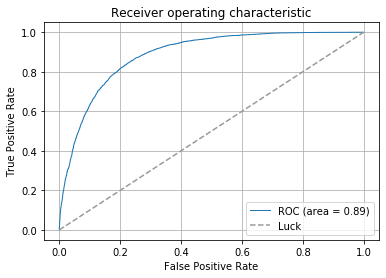

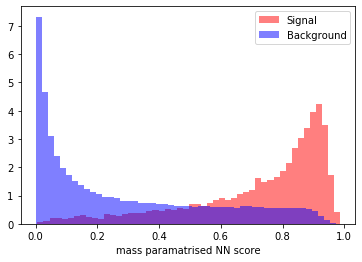

In [38]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

bins = 50
plt.hist(y_test_pred[y_test>0.5],alpha=0.5,color='r',bins=bins, density=True,label="Signal")
plt.hist(y_test_pred[y_test<0.5],alpha=0.5,color='b',bins=bins, density=True,label="Background")
plt.xlabel("mass paramatrised NN score")
plt.legend(loc="best")
plt.show()